In [1]:
import pandas as pd

In [2]:
genome_tags = pd.read_csv("../../ml-latest/genome-tags.csv")

In [3]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [4]:
genome_tags.shape

(1128, 2)

In [5]:
movies = pd.read_csv("../../ml-latest/movies.csv")

In [6]:
movies.shape

(58098, 3)

In [7]:
movies["movieId"].nunique()

58098

In [8]:
movies["movieId"].max()

193886

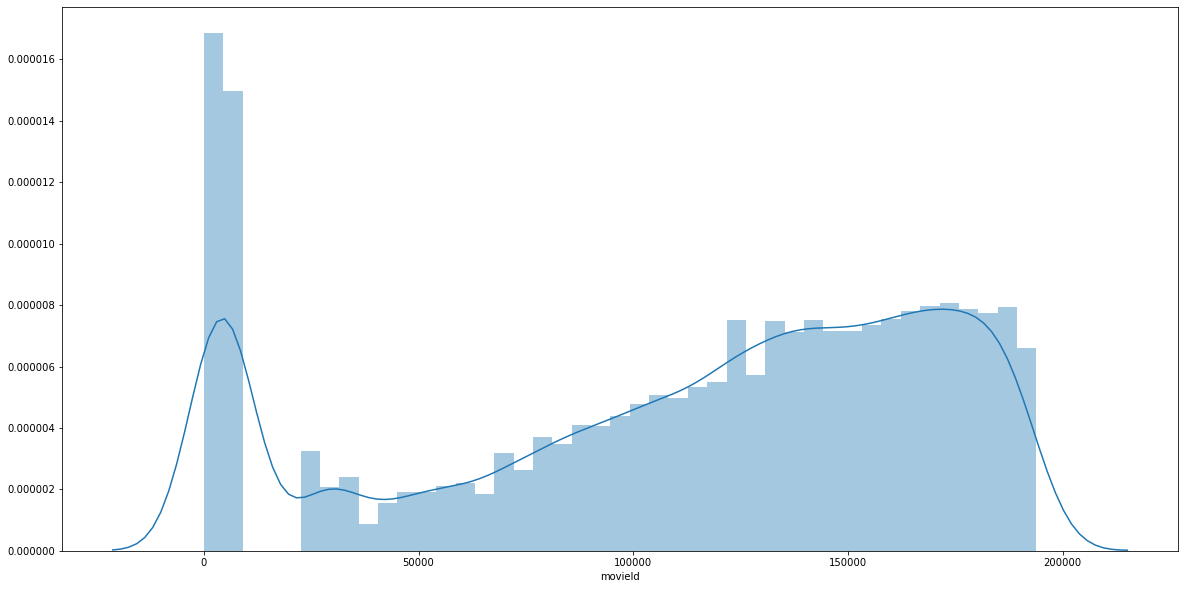

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

sns.distplot(movies["movieId"]);

In [10]:
movies["movieId"].describe()

count     58098.000000
mean     111919.516197
std       59862.660956
min           1.000000
25%       72437.750000
50%      126549.000000
75%      161449.500000
max      193886.000000
Name: movieId, dtype: float64

In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings = pd.read_csv("../../ml-latest/ratings.csv")

In [13]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [14]:
tags = pd.read_csv("../../ml-latest/tags.csv")

In [15]:
tags.head()

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [16]:
categorias = ['action','adaptation','adventure','apocalypse','artistic',\
              'assassination','based on a true story','biblical','blood','brutal','biographical','bollywood','boring',\
              'cars','cerebral','classic','censorship','comedy','computers','confusing',\
              'cooking','comic','cartoon','court','crime','cult','dark','death','disaster','documentary','drama',
              'depressing','drugs','environment','erotic','fantasy','fighting','football','freedom',\
              'friendship','genius','god','gothic','high school','historical','hollywood','horror',\
              'humor','homosexuality','holiday','independent film','kids','love','magic','marriage',\
              'military','murder','musical','nature','nostalgia','nudity','olympics','original','oscar',\
              'pirates','police','pornography','prison','prostitution','psychology','realistic',\
              'revolution','robot','romance','scary','science','sex','snakes','soccer','space','sports',\
              'spy','story','stunning','superhero','surreal','suspense','technology','teen','thriller',\
              'time','torture','tragedy','travel','treasure','true story','utopia','3d','war','wizards',\
              'zombie','dreamworks','disney','gore','imdb top 250','literary adaptation','mafia','pixar','sci fi','violence'
             ]

In [17]:
len(categorias)

110

In [18]:
len(set(categorias))

110

In [19]:
genome_tags_filtrado = genome_tags[genome_tags['tag'].isin(categorias)]

In [20]:
genome_tags_filtrado.head()

,tagId,tag
10,11,3d
18,19,action
20,21,adaptation
28,29,adventure
69,70,apocalypse


In [21]:
genome_scores = pd.read_csv("../../ml-latest/genome-scores.csv")

In [22]:
etiquetas_df = genome_scores[genome_scores['tagId'].isin(genome_tags_filtrado["tagId"])]
etiquetas_df.head()

,movieId,tagId,relevance
10,1,11,0.58700
18,1,19,0.66825
20,1,21,0.35725
28,1,29,0.90700
69,1,70,0.11475


In [23]:
etiquetas_relevancia = etiquetas_df.merge(genome_tags_filtrado, left_on='tagId', right_on='tagId')
                        #merge(movies, left_on = 'movieId', right_on = 'movieId')[["title","tag","relevance"]]

In [24]:
etiquetas_relevancia

,movieId,tagId,relevance,tag
0,1,11,0.58700,3d
1,2,11,0.08900,3d
2,3,11,0.02850,3d
3,4,11,0.02750,3d
4,5,11,0.02825,3d
...,...,...,...,...
1449355,185435,1127,0.13725,zombie
1449356,185585,1127,0.17475,zombie
1449357,186587,1127,0.20800,zombie
1449358,187593,1127,0.16050,zombie


In [25]:
completa = etiquetas_relevancia.pivot(index = 'movieId', columns = 'tag',values='relevance')

In [26]:
completa.columns = completa.columns.str.replace(' ', '_')
completa = movies.merge(completa, left_on = 'movieId', right_on = 'movieId').drop(columns='genres')
completa.head()

,movieId,title,3d,action,adaptation,adventure,apocalypse,artistic,assassination,based_on_a_true_story,...,torture,tragedy,travel,treasure,true_story,utopia,violence,war,wizards,zombie
0,1,Toy Story (1995),0.58700,0.66825,0.35725,0.9070,0.11475,0.33275,0.10125,0.10850,...,0.28750,0.18225,0.06750,0.10725,0.11000,0.14550,0.21900,0.06675,0.08250,0.09125
1,2,Jumanji (1995),0.08900,0.62400,0.51525,0.9780,0.20050,0.05650,0.07825,0.05800,...,0.08525,0.09750,0.05650,0.16275,0.07750,0.18750,0.17650,0.03450,0.20075,0.09925
2,3,Grumpier Old Men (1995),0.02850,0.15400,0.24525,0.3205,0.06150,0.03650,0.08700,0.05900,...,0.09150,0.09900,0.06875,0.08775,0.06975,0.08525,0.12275,0.03225,0.02125,0.09525
3,4,Waiting to Exhale (1995),0.02750,0.13950,0.51350,0.1465,0.04125,0.04575,0.08700,0.05600,...,0.09225,0.15225,0.02350,0.01625,0.08425,0.06200,0.13375,0.03075,0.02600,0.09175
4,5,Father of the Bride Part II (1995),0.02825,0.14475,0.25750,0.1525,0.05600,0.04775,0.08025,0.04075,...,0.06475,0.10300,0.03375,0.02175,0.06800,0.06800,0.08625,0.03275,0.02900,0.08875


In [27]:
metricas_ratings = ratings.groupby('movieId').agg({'userId': ['count'], 'rating': ['mean',pd.Series.mode]})

In [28]:
metricas_ratings.columns = metricas_ratings.columns.droplevel(0)

In [29]:
metricas_ratings.head()

,count,mean,mode
movieId,,,
1,68469,3.886649,4
2,27143,3.246583,3
3,15585,3.173981,3
4,2989,2.874540,3
5,15474,3.077291,3


In [30]:
completa_metricas = completa.merge(metricas_ratings,left_on = 'movieId', right_on = 'movieId')
completa_metricas.head()

,movieId,title,3d,action,adaptation,adventure,apocalypse,artistic,assassination,based_on_a_true_story,...,treasure,true_story,utopia,violence,war,wizards,zombie,count,mean,mode
0,1,Toy Story (1995),0.58700,0.66825,0.35725,0.9070,0.11475,0.33275,0.10125,0.10850,...,0.10725,0.11000,0.14550,0.21900,0.06675,0.08250,0.09125,68469,3.886649,4
1,2,Jumanji (1995),0.08900,0.62400,0.51525,0.9780,0.20050,0.05650,0.07825,0.05800,...,0.16275,0.07750,0.18750,0.17650,0.03450,0.20075,0.09925,27143,3.246583,3
2,3,Grumpier Old Men (1995),0.02850,0.15400,0.24525,0.3205,0.06150,0.03650,0.08700,0.05900,...,0.08775,0.06975,0.08525,0.12275,0.03225,0.02125,0.09525,15585,3.173981,3
3,4,Waiting to Exhale (1995),0.02750,0.13950,0.51350,0.1465,0.04125,0.04575,0.08700,0.05600,...,0.01625,0.08425,0.06200,0.13375,0.03075,0.02600,0.09175,2989,2.874540,3
4,5,Father of the Bride Part II (1995),0.02825,0.14475,0.25750,0.1525,0.05600,0.04775,0.08025,0.04075,...,0.02175,0.06800,0.06800,0.08625,0.03275,0.02900,0.08875,15474,3.077291,3


In [36]:
completa_metricas.describe()

,movieId,3d,action,adaptation,adventure,apocalypse,artistic,assassination,based_on_a_true_story,biblical,...,travel,treasure,true_story,utopia,violence,war,wizards,zombie,count,mean
count,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,...,13176.000000,13176.000000,13176.000000,13176.00000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000
mean,39970.868549,0.051533,0.259728,0.363142,0.221949,0.111485,0.173062,0.176164,0.113822,0.032999,...,0.058338,0.033314,0.139585,0.11682,0.276775,0.084208,0.046844,0.124597,2080.856254,3.277238
std,48151.129249,0.085475,0.256508,0.141648,0.187225,0.134507,0.181013,0.162966,0.164429,0.080469,...,0.061128,0.067877,0.174370,0.09643,0.233909,0.174799,0.084905,0.097827,5655.243811,0.486722
min,1.000000,0.012250,0.018500,0.106000,0.039250,0.011500,0.010000,0.018750,0.005750,0.002500,...,0.005250,0.002500,0.015500,0.02075,0.008000,0.000750,0.006750,0.041500,48.000000,0.873950
25%,3680.750000,0.025500,0.089500,0.264750,0.106000,0.046000,0.049250,0.076250,0.036250,0.011250,...,0.024500,0.011750,0.056750,0.06400,0.102500,0.014500,0.022500,0.085750,118.000000,2.991361
50%,7880.000000,0.030500,0.151500,0.325000,0.150000,0.065250,0.097000,0.113000,0.055750,0.015500,...,0.038000,0.017500,0.079750,0.08425,0.189250,0.025000,0.029000,0.099750,345.000000,3.347283
75%,71249.000000,0.040250,0.313750,0.423750,0.254000,0.112500,0.230250,0.204812,0.107750,0.026750,...,0.067500,0.029750,0.131812,0.12975,0.384313,0.053000,0.040000,0.123250,1354.000000,3.639719
max,187595.000000,0.945500,0.993250,0.928250,0.996250,0.994500,0.993250,0.989000,0.992250,0.999500,...,0.792500,0.992250,0.994000,0.94825,0.994500,0.997000,0.998000,0.990500,97999.000000,4.486518


In [31]:
completa_metricas.shape

(13176, 115)

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = []

x = completa_metricas.drop(columns=["title","mean","mode","movieId"])
#x = x.iloc[: ,indices]
y = completa_metricas["mean"]

model.fit(x,y)
score = model.score(x,y)
scores.append(score)

In [33]:
model.coef_ 

array([ 1.06835261e-01, -1.32011991e-01, -7.91048192e-02, -9.53187487e-03,
        5.54147914e-01,  3.19641372e-01,  1.45867609e-01,  1.14693786e-01,
       -1.39410040e-02, -6.40065788e-02,  2.38512899e-01,  6.37197166e-02,
       -1.74819993e+00,  5.85112846e-02,  1.24171637e-02,  1.60568308e-02,
        1.43420094e-01,  1.34736834e-01,  1.95827174e-01, -9.40594827e-02,
        2.53379831e-02,  7.44311937e-02,  9.41434530e-02,  1.26502210e-01,
        1.51092724e-02, -6.26855325e-03,  1.71750058e-01,  6.21982202e-03,
       -1.10328891e-01,  2.38134665e-02, -8.66746432e-01, -2.66250237e-02,
        8.57790041e-02,  9.25156953e-02, -4.83223184e-01,  4.95542880e-02,
       -8.87642880e-04, -1.37069782e-01, -2.92867307e-01,  5.54611195e-02,
        7.55382901e-02, -1.27774291e-04,  1.09477554e-01, -4.57846262e-02,
       -1.35628737e-01, -7.30981016e-02,  3.24438496e-02, -1.82965504e-01,
        5.47357014e-02, -2.50178052e-02, -1.56619698e-01, -2.02580282e-02,
       -4.81128834e-02,  

In [60]:
#model.coef_.index(max(model.coef_))

coeficientes = model.coef_

lista = sorted(coeficientes, reverse=True)

indices = [np.where(coeficientes == x)[0][0] for x in lista[0:50]]
x.iloc[: ,indices]

columnas_alt = x.iloc[: ,indices].columns

In [34]:
print(scores)

[0.8777731953148191]


In [258]:
len(columnas_alt)

20

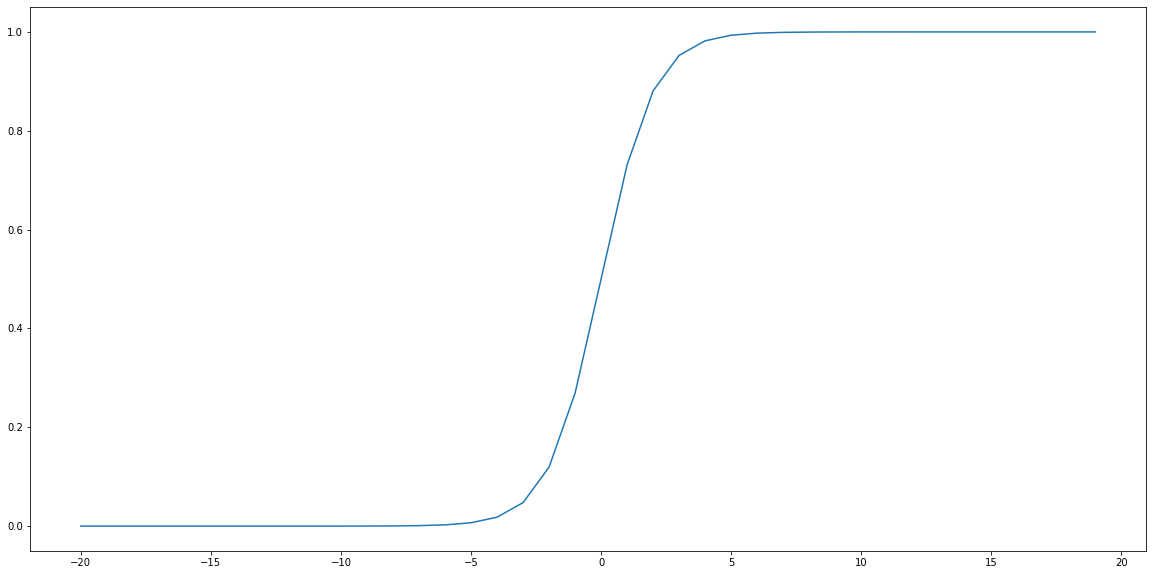

In [298]:
def sigmoide(lista):
    y = [1/(1+2.718**(-1*x)) for x in lista]
    return y
            
x = [float(x) for x in range(-20,20)]
y = sigmoide(x)

sns.lineplot(x,y)

In [289]:
2.00^2.00

TypeError: unsupported operand type(s) for ^: 'float' and 'float'